In [1]:
%matplotlib inline

In [36]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
time = ctrl.Antecedent(np.arange(0, 25, 1), 'time')
red = ctrl.Consequent(np.arange(0, 1024, 1), 'red')
green = ctrl.Consequent(np.arange(0, 1024, 1), 'green')
blue = ctrl.Consequent(np.arange(0, 1024, 1), 'blue')

# Auto-membership function population is possible with .automf(3, 5, or 7)
red.automf(3)
green.automf(3)
blue.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
time['morning'] = fuzz.trapmf(time.universe, [0, 0, 6, 12])
time['noon'] = fuzz.trimf(time.universe, [6, 12, 18])
time['evening'] = fuzz.trimf(time.universe, [12, 18, 24])
time['night'] = fuzz.trimf(time.universe, [18, 24, 25])

C:\Users\james\AppData\Roaming\Python\Python35\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


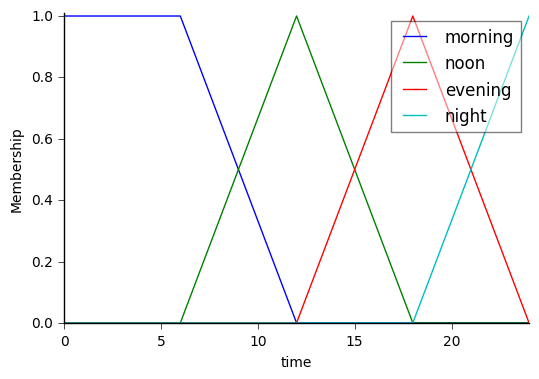

In [37]:
time.view()

C:\Users\james\AppData\Roaming\Python\Python35\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


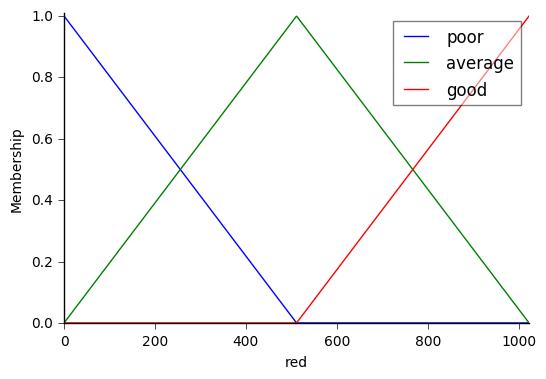

In [4]:
red.view()

In [40]:
rule1b = ctrl.Rule(time['night'], blue['poor'])
rule2b = ctrl.Rule(time['evening'], blue['average'])
rule3b = ctrl.Rule(time['morning'] | time['noon'], blue['good'])
rule1r = ctrl.Rule(time['night'], red['poor'])
rule2r = ctrl.Rule(time['morning'], red['average'])
rule3r = ctrl.Rule(time['noon'] | time['evening'], red['good'])
rule1g = ctrl.Rule(time['night'] | time['evening'] | time['morning'], green['poor'])
rule2g = ctrl.Rule(time['noon'], green['good'])

#rule1.view()

In [41]:
b_ctrl = ctrl.ControlSystem([rule1b, rule2b, rule3b])
amount_b = ctrl.ControlSystemSimulation(b_ctrl)

r_ctrl = ctrl.ControlSystem([rule1r, rule2r, rule3r])
amount_r = ctrl.ControlSystemSimulation(r_ctrl)

g_ctrl = ctrl.ControlSystem([rule1g, rule2g])
amount_g = ctrl.ControlSystemSimulation(g_ctrl)

C:\Users\james\AppData\Roaming\Python\Python35\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


598.935781754 184.708684628 484.754742987


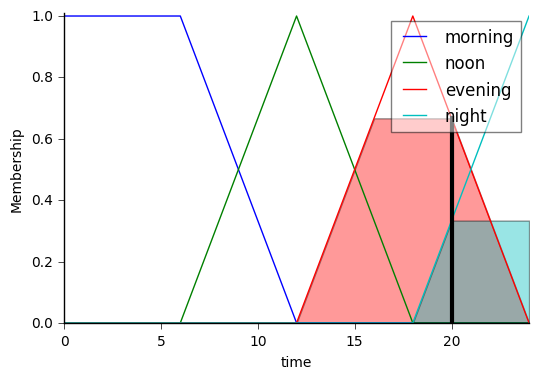

In [42]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
hour=20
amount_r.input['time'] = hour
amount_g.input['time'] = hour
amount_b.input['time'] = hour

# Crunch the numbers
amount_r.compute()
amount_g.compute()
amount_b.compute()


time.view(sim=amount_r)
#print(amount_r.output)
print(amount_r.output['red'], 
     amount_g.output['green'],
     amount_b.output['blue'])

In [8]:
help(red)

Help on Consequent in module skfuzzy.control.antecedent_consequent object:

class Consequent(skfuzzy.control.fuzzyvariable.FuzzyVariable)
 |  Consequent (output/control) variable for a fuzzy control system.
 |  
 |  Parameters
 |  ----------
 |  universe : array-like
 |      Universe variable. Must be 1-dimensional and convertible to a NumPy
 |      array.
 |  label : string
 |      Name of the universe variable.
 |  defuzzify_method : string
 |      name of method used for defuzzification, defaults to 'centroid'
 |  
 |  Notes
 |  -----
 |  The ``label`` string chosen must be unique among Antecedents and
 |  Consequents in the ``ControlSystem``.
 |  
 |  Method resolution order:
 |      Consequent
 |      skfuzzy.control.fuzzyvariable.FuzzyVariable
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, universe, label, defuzzify_method='centroid')
 |      Initialization of fuzzy variable
 |      
 |      Parameters
 |      ----------
 |      universe : array-li

In [10]:
help(red.accumulation_method)

Help on function accumulation_max in module skfuzzy.control.antecedent_consequent:

accumulation_max(*args)
    Take the maximum of input values/arrays.
    
    This is the default OR aggregation method for a fuzzy Rule.



In [12]:
from matplotlib import pyplot as PLT
import matplotlib.image as mpimg

In [13]:
help(mpimg)

Help on module matplotlib.image in matplotlib:

NAME
    matplotlib.image

DESCRIPTION
    The image module supports basic image loading, rescaling and display
    operations.

CLASSES
    matplotlib.artist.Artist(builtins.object)
        FigureImage(matplotlib.artist.Artist, matplotlib.cm.ScalarMappable)
        PcolorImage(matplotlib.artist.Artist, matplotlib.cm.ScalarMappable)
    matplotlib.cm.ScalarMappable(builtins.object)
        FigureImage(matplotlib.artist.Artist, matplotlib.cm.ScalarMappable)
        PcolorImage(matplotlib.artist.Artist, matplotlib.cm.ScalarMappable)
    _AxesImageBase(matplotlib.artist.Artist, matplotlib.cm.ScalarMappable)
        AxesImage
            NonUniformImage
        BboxImage
    
    class AxesImage(_AxesImageBase)
     |  Abstract base class for someone who renders into a
     |  :class:`FigureCanvas`.
     |  
     |  Method resolution order:
     |      AxesImage
     |      _AxesImageBase
     |      matplotlib.artist.Artist
     |      matpl

In [17]:
image = np.array([[[10, 249, 10]]])

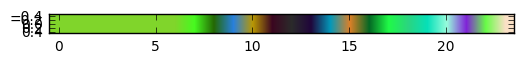

In [51]:
IM = np.zeros((24, 3))
for hour in range(24):
    amount_r.input['time'] = hour
    amount_g.input['time'] = hour
    amount_b.input['time'] = hour

    # Crunch the numbers
    amount_r.compute()
    amount_g.compute()
    amount_b.compute()


    pixel=[amount_r.output['red'], 
         amount_g.output['green'],
         amount_b.output['blue']]
    IM[hour] = pixel
    
    
PLT.imshow([IM])
PLT.show()

In [48]:
IM

array([[ 511.5       ,  170.50032584,  852.49967416],
       [ 511.5       ,  170.50032584,  852.49967416],
       [ 511.5       ,  170.50032584,  852.49967416],
       [ 511.5       ,  170.50032584,  852.49967416],
       [ 511.5       ,  170.50032584,  852.49967416],
       [ 511.5       ,  170.50032584,  852.49967416],
       [ 511.5       ,  170.50032584,  852.49967416],
       [ 518.30414297,  321.23216863,  848.44014503],
       [ 538.24525701,  424.06421825,  838.29131537],
       [ 572.39285714,  511.5       ,  824.08293509],
       [ 625.16666667,  598.93578175,  838.29131537],
       [ 707.99816579,  701.76783137,  848.44014503],
       [ 852.49967416,  852.49967416,  852.49967416],
       [ 848.44014503,  701.76783137,  707.99816579],
       [ 838.29131537,  598.93578175,  625.16666667],
       [ 824.08293509,  511.5       ,  572.39285714],
       [ 838.29131537,  424.06421825,  538.24525701],
       [ 848.44014503,  321.23216863,  518.30414297],
       [ 852.49967416,  170.

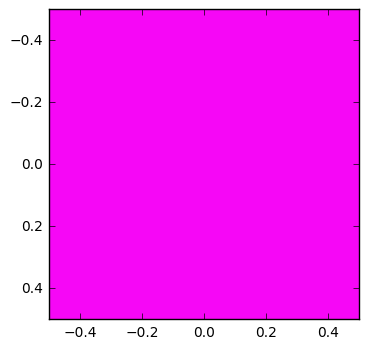

In [21]:
PLT.imshow(image)
PLT.show()

In [53]:
92/17

5.411764705882353